In [19]:
%load_ext autoreload

%autoreload 2

from rolling_plot_utils import (
    plot_years_and_seasons,
    get_season,
    get_cuml_desired_obs,
    BASELINE_SURVEY_START_MJD,
    MJD_2024,
    YEAR,
    make_default_healpix_footprints,
)

import numpy as np
import skyproj
# import proplot as pplt
import matplotlib.pyplot as plt
import healpy as hp


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
np.roll([2, 1, 0], 1)

array([0, 2, 1])

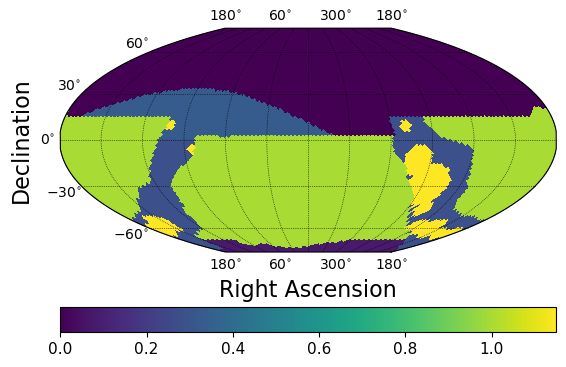

In [20]:
hp_footprints, wfd_idx = make_default_healpix_footprints()

fig, axs = plt.subplots()

sp = skyproj.McBrydeSkyproj(ax=axs)
# MollweideSkyproj(ax=axs[0, 0])
sp.draw_hpxmap(hp_footprints["r"])
sp.draw_colorbar(location="bottom", pad=0.15)

In [51]:
from footprints import make_rolling_footprints
from rolling_plot_utils import get_sun_ra_at_mjd, BASELINE_SURVEY_START_MJD, YEAR

shift = 0

print(get_sun_ra_at_mjd(BASELINE_SURVEY_START_MJD+shift))

footprint = make_rolling_footprints(
    fp_hp=hp_footprints,
    mjd_start=BASELINE_SURVEY_START_MJD+shift,
    sun_ra_start=get_sun_ra_at_mjd(BASELINE_SURVEY_START_MJD+shift),
    nslice=2,
    scale=0.9,
    nside=32,
    wfd_indx=wfd_idx,
    order_roll=1,
    n_cycles=None,
    n_constant_start=2,
    n_constant_end=6,
)

38.107888951531415
slice a w/ ra - sun_ra in [270, 90]: 1 1 D U 1 D U 1 D U 1 1 1 1 1 1 1
slice b w/ ra - sun_ra in [270, 90]: 1 1 U D 1 U D 1 U D 1 1 1 1 1 1 1
slice a w/ ra - sun_ra in [90, 270]: 1 1 1 U D 1 U D 1 U D 1 1 1 1 1 1
slice b w/ ra - sun_ra in [90, 270]: 1 1 1 D U 1 D U 1 D U 1 1 1 1 1 1


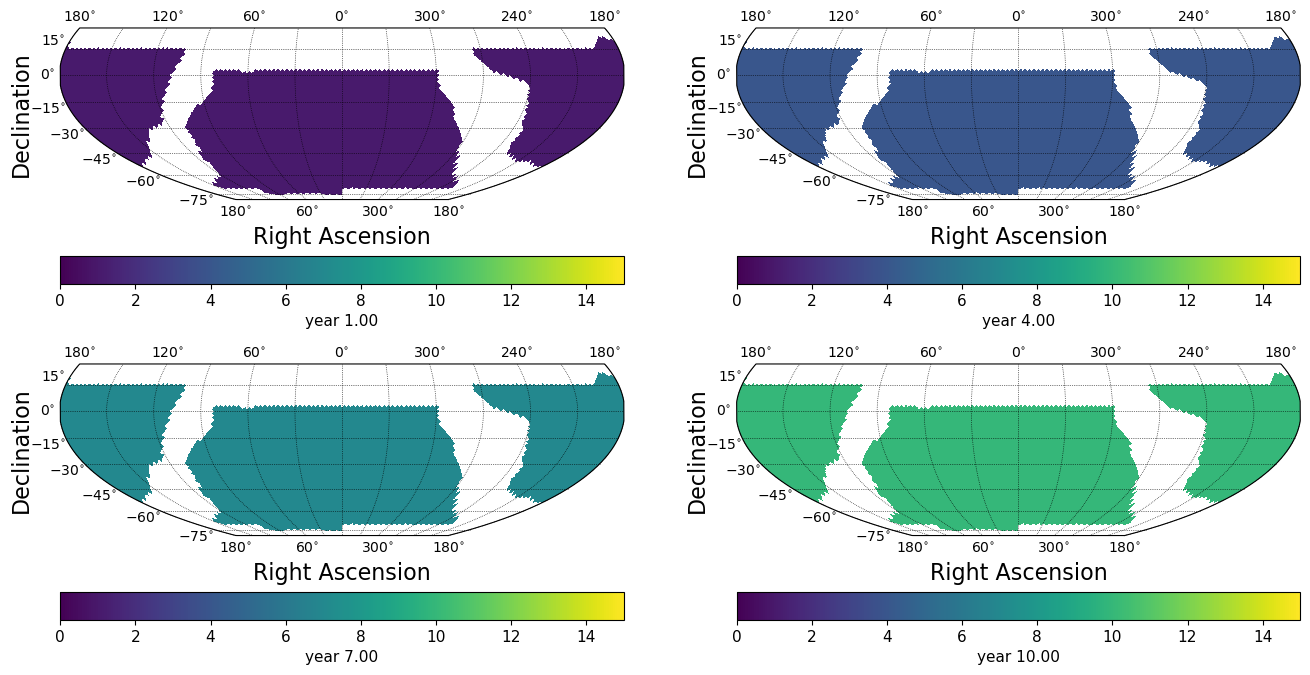

In [52]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

for i, dtime in enumerate([1, 4, 7, 10]):
    dtime += 0
    d = footprint(BASELINE_SURVEY_START_MJD + dtime * YEAR + shift, norm=False)
    
    rmap = d["r"] * 0 + np.nan
    rmap[wfd_idx] = d["r"][wfd_idx]
    
    sp = skyproj.McBrydeSkyproj(ax=axs.flatten()[i])
    sp.draw_hpxmap(rmap, vmin=0, vmax=15)
    sp.draw_colorbar(location="bottom", pad=0.2, label="year %0.2f" % dtime)

In [48]:
from rolling_plot_utils import make_footprint_gif

make_footprint_gif(
    "uniform",
    footprint,
    wfd_idx,
    BASELINE_SURVEY_START_MJD,
    10,
    images_per_year=10,
)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done   3 tasks      | elapsed:    3.9s
[Parallel(n_jobs=8)]: Done   4 tasks      | elapsed:    4.2s
[Parallel(n_jobs=8)]: Done   5 tasks      | elapsed:    4.3s
[Parallel(n_jobs=8)]: Done   6 tasks      | elapsed:    4.4s
[Parallel(n_jobs=8)]: Done   7 tasks      | elapsed:    4.4s
[Parallel(n_jobs=8)]: Done   8 tasks      | elapsed:    4.4s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    4.5s
[Parallel(n_jobs=8)]: Done  10 tasks      | elapsed:    4.5s
[Parallel(n_jobs=8)]: Done  11 tasks      | elapsed:    4.5s
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    4.9s
[Parallel(n_jobs=8)]: Done  13 tasks      | elapsed:    5.0s
[Parallel(n_jobs=8)]: Done  14 tasks      | elapsed:    5.1s
[Parallel(n_jobs=8)]: Done  15 tasks      | elapsed:    5.1s
[Parallel(